In [2]:
import torch
import numpy as np
from torch import nn, cuda
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [3]:
tr =  transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(".",download=True, train = True, transform = tr)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
type(dataset[0][0])

torch.Tensor

In [5]:
dataset[0][0].size()

torch.Size([1, 28, 28])

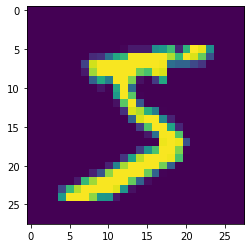

In [6]:
plt.imshow(dataset[0][0][0])

In [25]:
maxPool = torch.nn.MaxPool2d(2)

In [8]:
dataload = torch.utils.data.DataLoader(dataset, batch_size = 16)

In [10]:
for x,y in dataload:
  print(x.size())
  max_pooled_images = maxPool(x)
  break

torch.Size([16, 1, 28, 28])


In [12]:
def imshow(img, title=''):
    plt.title(title)
    if image.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        if img.shape[2] == 1:
          img = np.repeat(img, repeats=3, axis=2)
        plt.imshow(img)
    plt.show()

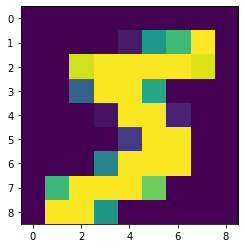

In [14]:
plt.imshow(max_pooled_images[0][0])

In [29]:
avgPool = torch.nn.AvgPool2d(2)
for x,y in dataload:
  print(x.size())
  avg_pooled_images = avgPool(x)
  print(avg_pooled_images.size())
  break

torch.Size([16, 1, 28, 28])
torch.Size([16, 1, 14, 14])


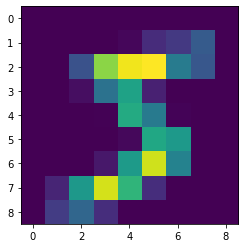

In [16]:
plt.imshow(avg_pooled_images[0][0])

In [26]:
for x,y in dataload:
  print(x.size())
  min_pooled_images = -maxPool(-x)
  images = x
  print(min_pooled_images.size())
  break

torch.Size([16, 1, 28, 28])
torch.Size([16, 1, 14, 14])


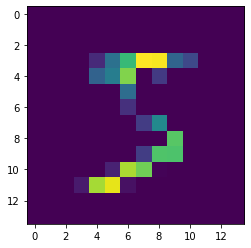

In [28]:
plt.imshow(min_pooled_images[0][0])

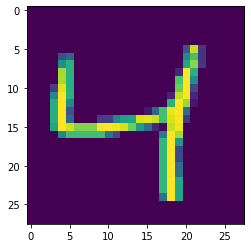

In [24]:
plt.imshow(images[2][0])

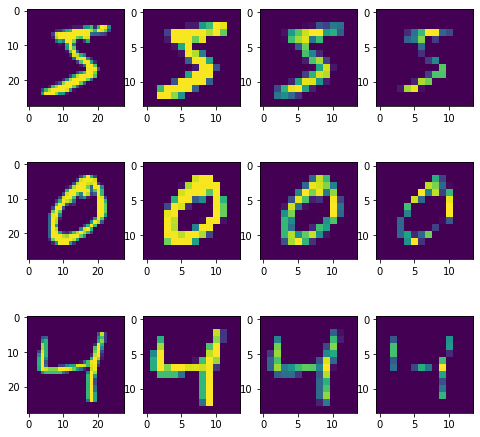

In [33]:
for x,y in dataload:
  images = x
  max_p = maxPool(x)
  avg_p = avgPool(x)
  min_p = -maxPool(-x)
  break
fig=plt.figure(figsize=(8, 8))
for i in range(3):
  fig.add_subplot(3,4,4*i+1)
  plt.imshow(x[i][0])
  fig.add_subplot(3,4,4*i+2)
  plt.imshow(max_p[i][0])
  fig.add_subplot(3,4,4*i+3)
  plt.imshow(avg_p[i][0])
  fig.add_subplot(3,4,4*i+4)
  plt.imshow(min_p[i][0])

**Partie 2**

In [34]:
from tqdm.notebook import tqdm
from time import sleep
from tqdm import trange, tnrange

In [35]:
class CNN(nn.Module):

    def __init__(self): 
        super(CNN, self).__init__() # call the constructor of nn.Module
        # you can now define some layers
        self.layers = nn.Sequential(nn.Conv2d(1, 4, kernel_size = 5, padding = 2, stride = 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2),
                                    nn.Conv2d(4, 8, kernel_size = 5, padding = 2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2 ),
                                    nn.Conv2d(8, 16, kernel_size = 5, padding = 2),
                                    nn.ReLU(),
                                    )
        self.linearlayer = nn.Linear(16*7*7,10)
        
    def forward(self, x): 
        # how do the layers compute the output ?
        # this function needs to return the output of the net
        # usually by applying the layers in the right order
        ...
        #x = x.to(device)
        result = self.layers(x)
        result = result.view(-1, 784)
        result = self.linearlayer(result)
        return result
    



In [36]:
cnn = CNN()

In [38]:
tr =  transforms.Compose([transforms.ToTensor()])
training_data_FM = datasets.FashionMNIST(".",download=True,train=True, transform = tr)
test_data_FM = datasets.FashionMNIST(".",download=True,train=False, transform = tr)

In [39]:
testloader = torch.utils.data.DataLoader(test_data_FM, batch_size = 1)

In [40]:
#criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(cnn.parameters(),lr=5e-3,betas=(0.9, 0.999),eps=1e-08)

def train_epoch(net, dataset, opt, criterion, batch_size=50):
    net.train()# pass model to training mode
    criterion = nn.CrossEntropyLoss() 
    opt = torch.optim.Adam(net.parameters(),lr=5e-3,betas=(0.9, 0.999),eps=1e-08)
    losses = []
    trainloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size)
    for x_batch, y_batch in tqdm( trainloader ):
        opt.zero_grad()
        # Forward
        y_comp = net(x_batch)
        # Compute diff
        loss = criterion(y_comp, y_batch)
        # Compute gradients
        loss.backward()
        # update weights
        opt.step()
        losses.append(loss.data.numpy())
    return losses   
    
def accuracy(net, dataset = testloader):
    net.eval() # pass model to evaluation mode :
               # do not track the gradients
    correct = 0
    total = 0
    j = 0
    for data in dataset:
        points, labels = data
        outputs = net(points)
        #predicted = torch.round(outputs.data)
        prediction = torch.argmax(outputs)
        #print(labels)
        #print(prediction)
        total += labels.size(0)
        correct += np.abs((float(prediction- labels[0])))<0.5
        

        #correct += (prediction == labels)

    net.train() # pass the model to training mode
    return correct / total


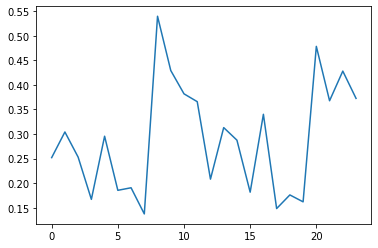

In [43]:
L = []
for i in range(2):
  L += train_epoch(cnn, training_data_FM, opt, criterion, batch_size = 50)[::100]
plt.plot(L)
plt.show()

In [44]:
print(accuracy(cnn))

0.875


**Question 5**



















In [45]:
class CNN2(nn.Module):

    def __init__(self): 
        super(CNN2, self).__init__() # call the constructor of nn.Module
        # you can now define some layers
        self.layers = nn.Sequential(nn.Conv2d(1, 2, kernel_size = 5, padding = 2, stride = 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2),
                                    nn.Conv2d(2, 4, kernel_size = 5, padding = 2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2 ),
                                    nn.Conv2d(4, 8, kernel_size = 5, padding = 2),
                                    nn.ReLU(),
                                    )
        self.linearlayer = nn.Linear(8*7*7,10)
        
    def forward(self, x): 
        # how do the layers compute the output ?
        # this function needs to return the output of the net
        # usually by applying the layers in the right order
        ...
        #x = x.to(device)
        result = self.layers(x)
        result = result.view(-1, 392)
        result = self.linearlayer(result)
        return result
    

In [46]:
cnn2 = CNN2()

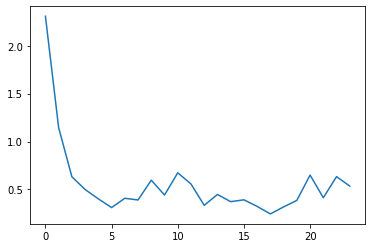

In [47]:
L = []
for i in range(2):
  L += train_epoch(cnn2, training_data_FM, opt, criterion, batch_size = 50)[::100]
plt.plot(L)
plt.show()

In [48]:
print(accuracy(cnn2))

0.8549


La précision du modèle décroit quand on réduit le nombre de paramètres.

**Question 6**

In [52]:
class CNN3(nn.Module):

    def __init__(self): 
        super(CNN3, self).__init__() # call the constructor of nn.Module
        # you can now define some layers
        self.layers = nn.Sequential(nn.Conv2d(1, 2, kernel_size = 3, padding = 1, stride = 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2),
                                    nn.Conv2d(2, 4, kernel_size = 3, padding = 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2 ),
                                    nn.Conv2d(4, 8, kernel_size = 3, padding = 1),
                                    nn.ReLU(),
                                    )
        self.linearlayer = nn.Linear(8*7*7,10)
        
    def forward(self, x): 
        # how do the layers compute the output ?
        # this function needs to return the output of the net
        # usually by applying the layers in the right order
        ...
        #x = x.to(device)
        result = self.layers(x)
        result = result.view(-1, 392)
        result = self.linearlayer(result)
        return result

In [55]:
cnn3 = CNN3()

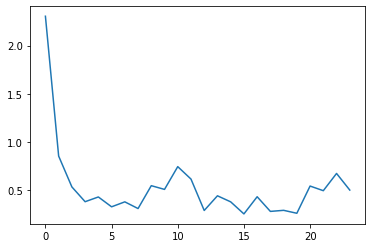

In [56]:
L = []
for i in range(2):
  L += train_epoch(cnn3, training_data_FM, opt, criterion, batch_size = 50)[::100]
plt.plot(L)
plt.show()

In [57]:
print(accuracy(cnn3))

0.8565


On remarque que le filtre $ 5\times5 $ donne une meilleure précision que le filtre $ 3 \times 3$

**Questions 7,8**

Le nombre de paramètres du premier réseau est : 
$$ (5 \cdot 5+1) \cdot 4  + (5\cdot5\cdot4+1)\cdot8+ (5\cdot5\cdot8+1)\cdot16 + 16\cdot7\cdot7\cdot10 = 11968 $$

Le nombre de paramètre dans le deuxième réseau est: 
$$ (5\cdot5+1)\cdot4+ 4\cdot28\cdot28\cdot10  = 31464$$ 

In [58]:
class CNN2L(nn.Module):

    def __init__(self): 
        super(CNN2L, self).__init__() # call the constructor of nn.Module
        # you can now define some layers
        self.layers = nn.Sequential(nn.Conv2d(1, 4, kernel_size = 5, padding = 2, stride = 1),
                                    nn.ReLU(),
                                    )
        self.linearlayer = nn.Linear(4*28*28,10)
        
    def forward(self, x): 
        # how do the layers compute the output ?
        # this function needs to return the output of the net
        # usually by applying the layers in the right order
        ...
        #x = x.to(device)
        result = self.layers(x)
        result = result.view(-1, 4*28*28)
        result = self.linearlayer(result)
        return result

In [59]:
cnn2l = CNN2L()

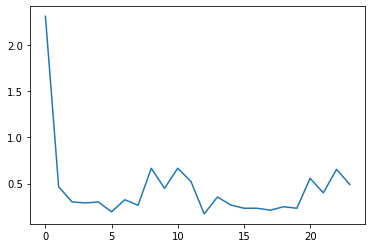

In [62]:
L = []
for i in range(2):
  L += train_epoch(cnn2l, training_data_FM, opt, criterion, batch_size = 50)[::100]
plt.plot(L)
plt.show()

In [64]:
print(accuracy(cnn2l))

0.8709


**Question 9**

In [65]:
class LeNet(nn.Module):

    def __init__(self): 
        super(LeNet, self).__init__() # call the constructor of nn.Module
        # you can now define some layers
        self.layers = nn.Sequential(nn.Conv2d(1, 6, kernel_size = 5, padding = 2, stride = 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2),
                                    nn.Conv2d(6, 16, kernel_size = 5),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, stride = 2 )
                                    )
        self.linearlayer = nn.Sequential(nn.Linear(16*5*5,120),
                                         nn.Linear(120, 84),
                                         nn.Linear(84, 10))
                                         
        
    def forward(self, x): 
        # how do the layers compute the output ?
        # this function needs to return the output of the net
        # usually by applying the layers in the right order
        ...
        #x = x.to(device)
        result = self.layers(x)
        result = result.view(-1, 16*5*5)
        result = self.linearlayer(result)
        return result

In [66]:
lenet = LeNet()

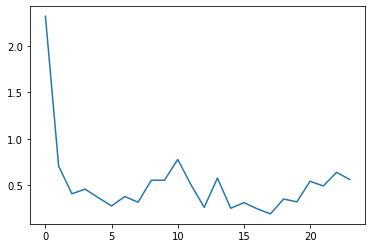

In [67]:
L = []
for i in range(2):
  L += train_epoch(lenet, training_data_FM, opt, criterion, batch_size = 50)[::100]
plt.plot(L)
plt.show()

In [ ]:
print(accuracy(lenet))

0.8551


In [72]:
import torchvision.models as models
# load pretrained model
alexnet = models.alexnet(pretrained=True)
# access weights from first layer
filter = alexnet.features[0].weight.data
# normalize to [0, 1]
filter = (1/(2*filter.max()))*filter + 0.5

In [73]:
len(filter)

64

In [77]:
filter.size()

torch.Size([64, 3, 11, 11])

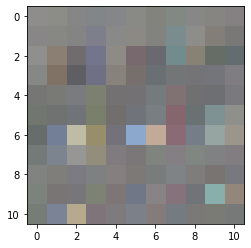

In [81]:
plt.imshow(filter[0].view(11,11,3))

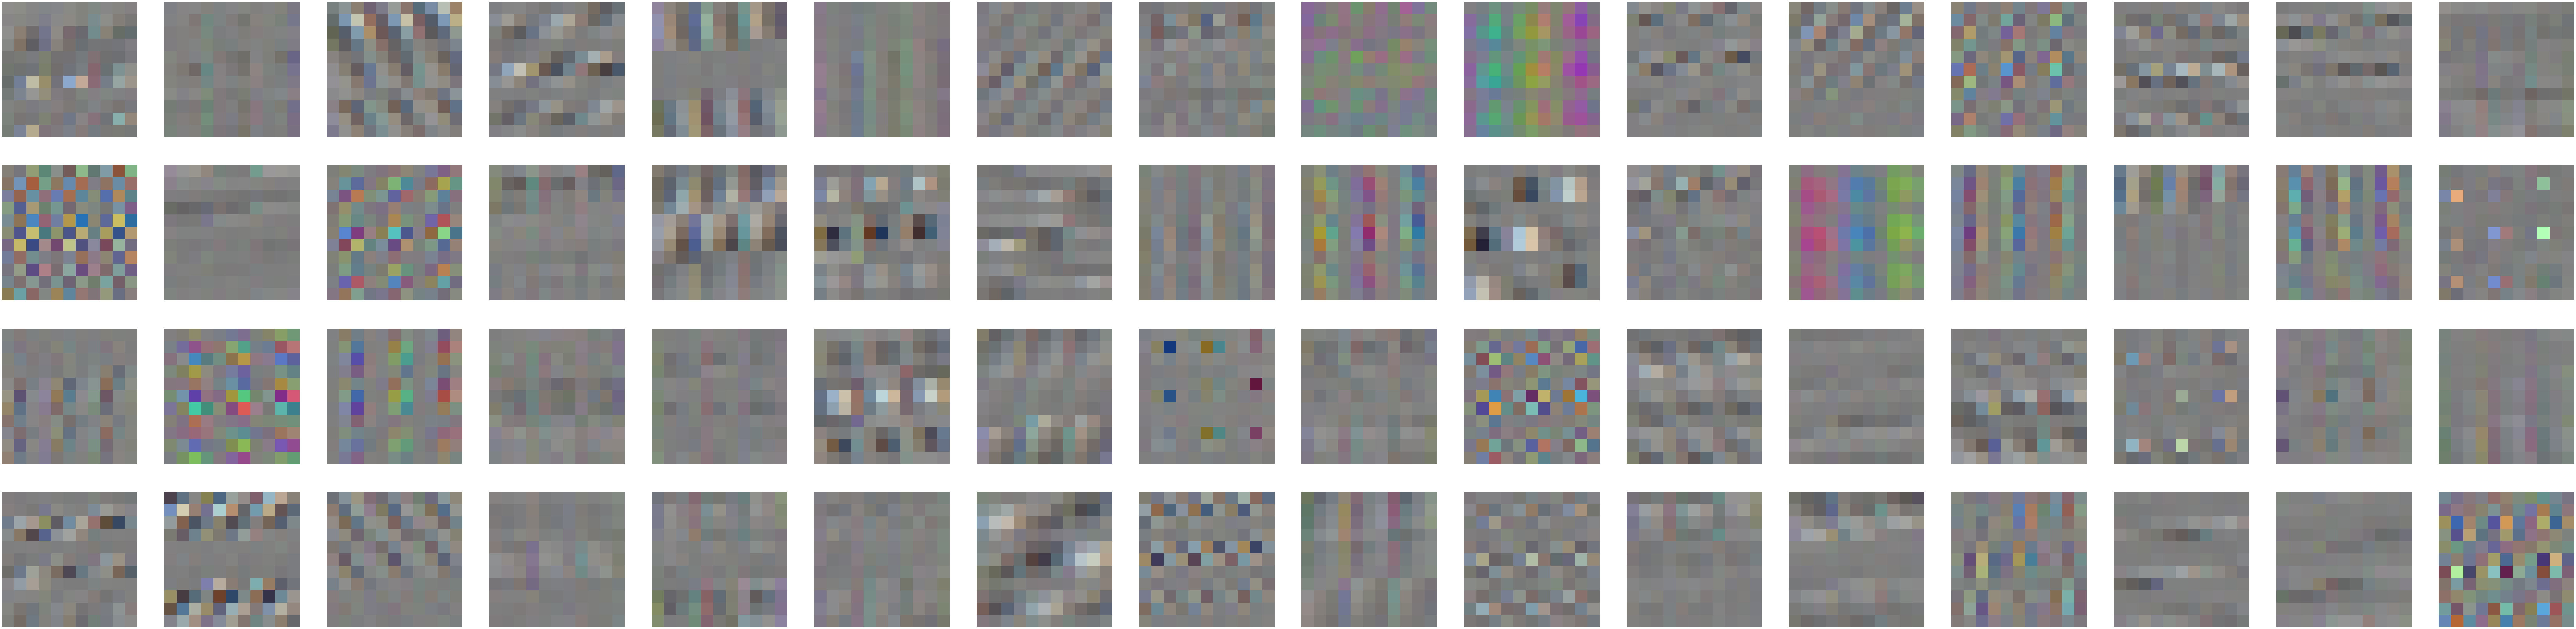

In [102]:
f, ax = plt.subplots(4,16, figsize=(176, 44))
for i in range(64):
  #fig.add_subplot(4,16, i+1 )
  ax[i//16,i%16].imshow(filter[i].view(11,11,3), interpolation="nearest")
  ax[i//16,i%16].axis('off')
plt.show()
